# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: ({len(cities)})")


Number of cities in the list: (606)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?&q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        test = city_weather['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']  
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teahupoo
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | tawkar
City not found. Skipping...
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | todos santos
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | montepuez
Processing Record 9 of Set 1 | tornio
Processing Record 10 of Set 1 | denpasar
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | eureka
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Se

Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | adrar
Processing Record 39 of Set 4 | katangli
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | berezovyy
Processing Record 45 of Set 4 | peniche
Processing Record 46 of Set 4 | sabang
Processing Record 47 of Set 4 | agua dulce
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | mgandu
Processing Record 0 of Set 5 | francistown
Processing Record 1 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 2 of Set 5 | kroya
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | eston
Processing Record 5 of Set 5 | karamay
City not found. Skipping...
Processing Record 6 of Set 5 | tarauaca
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | newry
Process

Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | cap-aux-meules
Processing Record 27 of Set 8 | santa fe
Processing Record 28 of Set 8 | benjamin constant
Processing Record 29 of Set 8 | dubbo
Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | kang
Processing Record 32 of Set 8 | maroantsetra
Processing Record 33 of Set 8 | hashtrud
Processing Record 34 of Set 8 | matara
Processing Record 35 of Set 8 | kutum
Processing Record 36 of Set 8 | tabuleiro do norte
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | artigas
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | bowmore
Processing Record 41 of Set 8 | akom
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | havelock
Processing Record 44 of Set 8 | kuche
City not found. Skipping...
Processing Record 45 of Set 8 | kananga
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | kavaratti
Processing Record 

Processing Record 15 of Set 12 | bac lieu
Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | saint-pierre
Processing Record 18 of Set 12 | port lincoln
Processing Record 19 of Set 12 | sola
Processing Record 20 of Set 12 | obzor
Processing Record 21 of Set 12 | fort wellington
Processing Record 22 of Set 12 | straumen
Processing Record 23 of Set 12 | prainha
Processing Record 24 of Set 12 | nuristan
Processing Record 25 of Set 12 | talcahuano
Processing Record 26 of Set 12 | smithers
Processing Record 27 of Set 12 | miranorte
City not found. Skipping...
Processing Record 28 of Set 12 | ashford
Processing Record 29 of Set 12 | estelle
Processing Record 30 of Set 12 | yingkou
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | orativ
Processing Record 33 of Set 12 | koshurnikovo
Processing Record 34 of Set 12 | tigil
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | inhambane
Processing Record 37 of Set 12 | boa vista
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teahupoo,-17.8333,-149.2667,20.98,65,44,2.04,PF,1675869380
1,kodiak,57.7900,-152.4072,-9.27,73,0,0.00,US,1675869382
2,kaitangata,-46.2817,169.8464,9.02,69,40,6.34,NZ,1675869387
3,mahebourg,-20.4081,57.7000,27.16,74,75,3.60,MU,1675869397
4,todos santos,23.4500,-110.2167,17.47,57,5,1.80,MX,1675869398


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teahupoo,-17.8333,-149.2667,20.98,65,44,2.04,PF,1675869380
1,kodiak,57.7900,-152.4072,-9.27,73,0,0.00,US,1675869382
2,kaitangata,-46.2817,169.8464,9.02,69,40,6.34,NZ,1675869387
3,mahebourg,-20.4081,57.7000,27.16,74,75,3.60,MU,1675869397
4,todos santos,23.4500,-110.2167,17.47,57,5,1.80,MX,1675869398


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

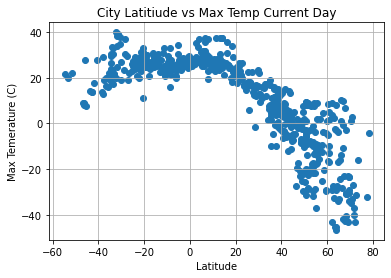

In [8]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the ptother graph properties
plt.title('City Latitiude vs Max Temp Current Day')
plt.ylabel('Max Temerature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

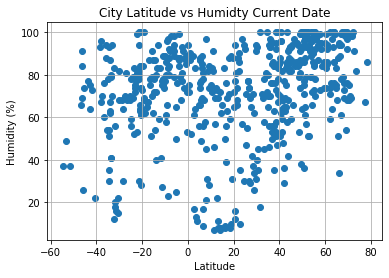

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('City Latitude vs Humidty Current Date')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

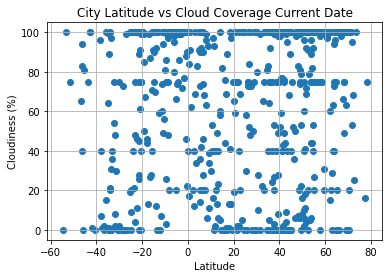

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.title('City Latitude vs Cloud Coverage Current Date')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

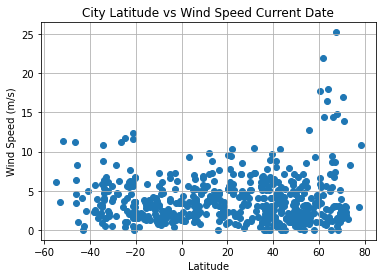

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed Current Date')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def weather_regress(x,y,x2,y2,size):
    plt.scatter(x,y)
    w_slope, w_intercept, w_r, w_p, w_se = linregress(x,y)
    regress_values = x * w_slope + w_intercept
    plt.plot(x,regress_values, color = "red")
    line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_intercept,2))
    plt.annotate(line_eq,(x2,y2),fontsize=size, color="red")
    print(f"The R-Value for this example is {w_r**2}")
    

    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,-9.27,73,0,0.00,US,1675869382
4,todos santos,23.4500,-110.2167,17.47,57,5,1.80,MX,1675869398
7,tornio,65.8481,24.1466,1.01,95,100,8.70,FI,1675869399
10,thompson,55.7435,-97.8558,-12.91,92,75,1.54,CA,1675869400
11,eureka,40.8021,-124.1637,7.33,96,59,1.63,US,1675869401


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teahupoo,-17.8333,-149.2667,20.98,65,44,2.04,PF,1675869380
2,kaitangata,-46.2817,169.8464,9.02,69,40,6.34,NZ,1675869387
3,mahebourg,-20.4081,57.7000,27.16,74,75,3.60,MU,1675869397
5,rikitea,-23.1203,-134.9692,26.19,75,4,6.07,PF,1675869398
6,montepuez,-13.1256,38.9997,22.65,94,100,3.21,MZ,1675869399


###  Temperature vs. Latitude Linear Regression Plot

The R-Value for this example is 0.7343284413611183


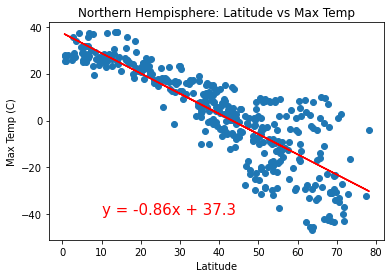

In [42]:
#Northern Hemisphere vs Max Temp 
weather_regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 10,-40, 15)
plt.title('Northern Hempisphere: Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

The R-Value for this example is 0.11882164689665631


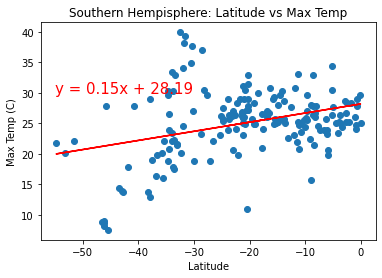

In [43]:
# Linear regression on Southern Hemisphere
weather_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 30,15)
plt.title('Southern Hempisphere: Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

**Discussion about the linear relationship: This pair of linear regression models are comparing the relationship of a cities latitude vs a cities Max temp. The correlation between Latitude and Tempreture appears to generally be the closer latitude gets to 0, the higher the tempreture gets. This can be seen by the positive relationship between Latitude and Max temp in the Southern Hemisphere and the negative relationship between latitude and temp in the Northern Hemisphere. A notable observation is that the correlation appears to be a good amount stronger in northern latitudes vs the southern latitudes. 

### Humidity vs. Latitude Linear Regression Plot

The R-Value for this example is 0.1947866710455783


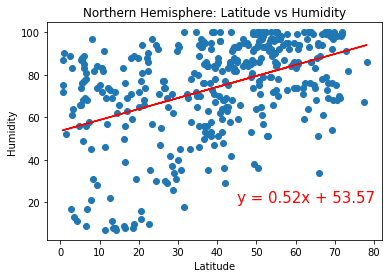

In [58]:
# Northern Hemisphere
weather_regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 45,20,15)
plt.title('Northern Hemisphere: Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


The R-Value for this example is 0.11276229373965846


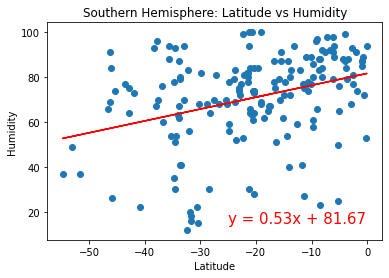

In [60]:
# Southern Hemisphere
weather_regress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],-25 , 15, 15)
plt.title('Southern Hemisphere: Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship: Humidity appears to be weakly and positively correlated with latitude (i.e the more latitude increases the higher the Humidity % goes). This appears to be the case regardless of hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-Value for this example is 0.024833625385278956


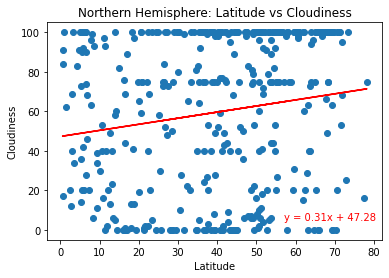

In [57]:
# Northern Hemisphere
weather_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],57,5, 10)
plt.title('Northern Hemisphere: Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The R-Value for this example is 0.13558714386303736


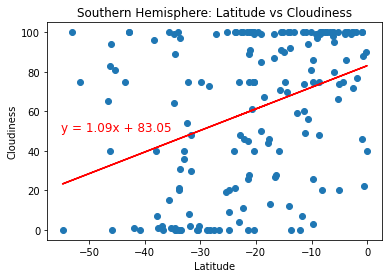

In [61]:
# Southern Hemisphere
weather_regress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], -55,50, 12)
plt.title('Southern Hemisphere: Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship: Both hemispheres appear to show a positive correlation but neither appears to be strong. It is somewhat stronger in southern latitudes but there appears to be almost no correlation in northern latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

The R-Value for this example is 0.0037865586851828937


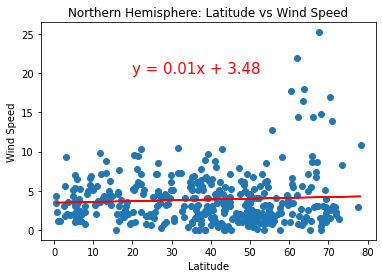

In [64]:
# Northern Hemisphere
weather_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],20, 20, 15)
plt.title('Northern Hemisphere: Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The R-Value for this example is 0.06876232199750017


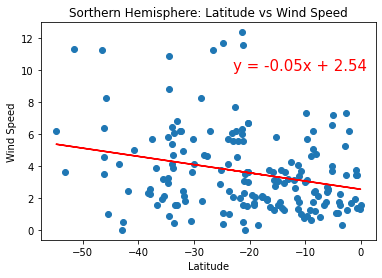

In [70]:
# Southern Hemisphere
weather_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-23, 10, 15)
plt.title('Sorthern Hemisphere: Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship: There does not really appear to be any kind of relationship in either direction for either hemisphere. Wind speed does not appear to be correlated with latitude